# Домашняя работа

In [415]:
import scipy.stats as stats
import csv as csv
import numpy as np
import pandas as pd
import seaborn as sns
import fnmatch
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Задача 1

$Глоссарий$  
  
ATP = Tournament number    
Location = Venue of tournament  
Tournament = Name of tounament (including sponsor if relevant)  
Data = Date of match (note: prior to 2003 the date shown for all matches played in a single tournament is the start date)  
Series = Name of ATP tennis series (Grand Slam, Masters, International or International Gold)  
Court = Type of court (outdoors or indoors)  
Surface = Type of surface (clay, hard, carpet or grass)  
Round = Round of match   
Best of = Maximum number of sets playable in match  
Winner = Match winner  
Loser = Match loser  
WRank = ATP Entry ranking of the match winner as of the start of the tournament  
LRank = ATP Entry ranking of the match loser as of the start of the tournament  
WPts = ATP Entry points of the match winner as of the start of the tournament  
LPts = ATP Entry points of the match loser as of the start of the tournament  
W1 = Number of games won in 1st set by match winner  
L1 = Number of games won in 1st set by match loser  
W2 = Number of games won in 2nd set by match winner  
L2 = Number of games won in 2nd set by match loser  
W3 = Number of games won in 3rd set by match winner  
L3 = Number of games won in 3rd set by match loser  
W4 = Number of games won in 4th set by match winner  
L4 = Number of games won in 4th set by match loser  
W5 = Number of games won in 5th set by match winner  
L5 = Number of games won in 5th set by match loser  
Wsets = Number of sets won by match winner  
Lsets = Number of sets won by match loser  
Comment = Comment on the match (Completed, won through retirement of loser, or via Walkover)  
  
  
Key to match betting odds data:  
  
B365W = Bet365 odds of match winner  
B365L = Bet365 odds of match loser  
B&WW = Bet&Win odds of match winner  
B&WL = Bet&Win odds of match loser  
CBW = Centrebet odds of match winner   
CBL = Centrebet odds of match loser  
EXW = Expekt odds of match winner  
EXL = Expekt odds of match loser  
LBW = Ladbrokes odds of match winner  
LBL = Ladbrokes odds of match loser  
GBW = Gamebookers odds of match winner  
GBL = Gamebookers odds of match loser  
IWW = Interwetten odds of match winner  
IWL = Interwetten odds of match loser  
PSW = Pinnacles Sports odds of match winner  
PSL = Pinnacles Sports odds of match loser  
SBW = Sportingbet odds of match winner  
SBL = Sportingbet odds of match loser  
SJW = Stan James odds of match winner  
SJL = Stan James odds of match loser  
UBW = Unibet odds of match winner  
UBL = Unibet odds of match loser  
  
MaxW= Maximum odds of match winner (as shown by Oddsportal.com)  
MaxL= Maximum odds of match loser (as shown by Oddsportal.com)  
AvgW= Average odds of match winner (as shown by Oddsportal.com)  
AvgL= Average odds of match loser (as shown by Oddsportal.com)  

In [416]:
tennis = pd.read_csv('/Users/Максим/Downloads/ausopen.csv') 

In [417]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 40 columns):
ATP           127 non-null int64
Location      127 non-null object
Tournament    127 non-null object
Date          127 non-null object
Series        127 non-null object
Court         127 non-null object
Surface       127 non-null object
Round         127 non-null object
Best of       127 non-null int64
Winner        127 non-null object
Loser         127 non-null object
WRank         127 non-null int64
LRank         125 non-null float64
WPts          127 non-null int64
LPts          125 non-null float64
W1            127 non-null int64
L1            127 non-null int64
W2            127 non-null int64
L2            127 non-null int64
W3            125 non-null float64
L3            125 non-null float64
W4            63 non-null float64
L4            63 non-null float64
W5            20 non-null float64
L5            20 non-null float64
Wsets         127 non-null int64
Lsets         12

In [418]:
tennis.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts',
       'W1', 'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets',
       'Lsets', 'Comment', 'B365W', 'B365L', 'EXW', 'EXL', 'LBW', 'LBL', 'PSW',
       'PSL', 'MaxW', 'MaxL', 'AvgW', 'AvgL'],
      dtype='object')

In [419]:
tennis.head(5)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,6,Melbourne,Australian Open,18/01/16,Grand Slam,Outdoor,Hard,1st Round,5,Basic M.,...,2.80,1.42,3.00,1.40,2.99,1.45,3.10,1.45,2.90,1.40
1,6,Melbourne,Australian Open,18/01/16,Grand Slam,Outdoor,Hard,1st Round,5,Goffin D.,...,1.11,5.75,1.12,6.00,1.16,6.10,1.16,7.00,1.13,5.86
2,6,Melbourne,Australian Open,18/01/16,Grand Slam,Outdoor,Hard,1st Round,5,Dzumhur D.,...,3.75,1.25,3.75,1.29,3.69,1.33,3.90,1.33,3.62,1.28
3,6,Melbourne,Australian Open,18/01/16,Grand Slam,Outdoor,Hard,1st Round,5,Brands D.,...,1.38,3.00,1.40,3.00,1.37,3.39,1.45,3.39,1.38,3.03
4,6,Melbourne,Australian Open,18/01/16,Grand Slam,Outdoor,Hard,1st Round,5,Nishikori K.,...,1.22,4.00,1.22,4.33,1.27,4.22,1.27,4.50,1.23,4.15


In [420]:
tennis.tail(3)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
124,6,Melbourne,Australian Open,28/01/16,Grand Slam,Outdoor,Hard,Semifinals,5,Djokovic N.,...,1.33,3.1,1.30,3.5,1.36,3.60,1.40,3.75,1.32,3.41
125,6,Melbourne,Australian Open,29/01/16,Grand Slam,Outdoor,Hard,Semifinals,5,Murray A.,...,1.38,3.0,1.33,3.4,1.40,3.35,1.41,3.50,1.36,3.19
126,6,Melbourne,Australian Open,31/01/16,Grand Slam,Outdoor,Hard,The Final,5,Djokovic N.,...,1.20,4.4,1.20,5.0,1.21,5.38,1.22,5.50,1.19,4.92


In [421]:
tennis.describe()

,ATP,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
count,127.0,127.0,127.000000,125.000000,127.000000,125.000000,127.000000,127.000000,127.000000,127.000000,...,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,6.0,5.0,48.204724,84.504000,3150.519685,1150.536000,5.952756,3.952756,5.606299,4.354331,...,1.691181,5.070866,1.737244,5.843228,1.810394,7.622992,1.867559,8.281811,1.727087,5.743622
std,0.0,0.0,65.211176,85.353121,4062.561185,1367.862263,1.014641,1.807648,1.464704,1.875183,...,1.227343,4.294717,1.349790,6.044750,1.600700,10.798846,1.744209,12.231749,1.366058,5.498085
min,6.0,5.0,1.000000,2.000000,146.000000,38.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.070000,1.000000,1.070000,1.000000,1.080000,1.010000,1.080000,1.010000,1.060000
25%,6.0,5.0,8.000000,NaN,756.000000,NaN,6.000000,3.000000,6.000000,3.000000,...,1.105000,2.450000,1.105000,2.440000,1.110000,2.535000,1.130000,2.590000,1.100000,2.420000
50%,6.0,5.0,25.000000,NaN,1485.000000,NaN,6.000000,4.000000,6.000000,4.000000,...,1.250000,3.500000,1.290000,3.750000,1.310000,3.840000,1.310000,4.100000,1.270000,3.680000
75%,6.0,5.0,65.500000,NaN,4145.000000,NaN,6.000000,6.000000,6.000000,6.000000,...,1.510000,6.000000,1.550000,6.750000,1.585000,8.090000,1.630000,8.135000,1.555000,6.935000
max,6.0,5.0,328.000000,696.000000,16790.000000,8945.000000,7.000000,7.000000,7.000000,7.000000,...,8.000000,28.000000,8.500000,34.000000,10.440000,81.000000,13.000000,91.000000,8.920000,32.550000


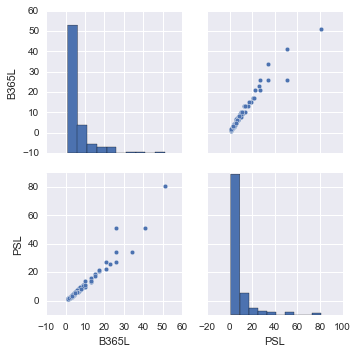

In [422]:
sns.pairplot(tennis[['B365L', 'PSL']])

Сравнение ставок на проигравшего матч букмекерских компаний Bet365 и  Pinnacles Sports

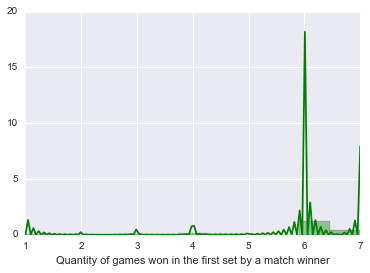

In [423]:
sns.distplot(tennis.W1, color = 'green', axlabel = 'Quantity of games won in the first set by a match winner')

 График показывает распределение количества выигранных геймов в первом сете победителем матча. При выигрыше 6 и 7 геймов игрок почти наверняка выиграл сет.

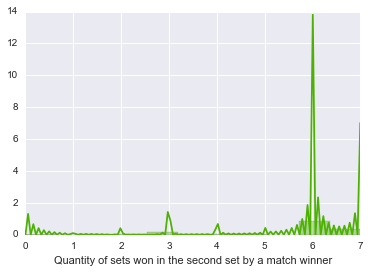

In [424]:
sns.distplot(tennis.W2, color = '#4CB100', axlabel = 'Quantity of sets won in the second set by a match winner')

 График показывает распределение количества выигранных геймов во втором сете.

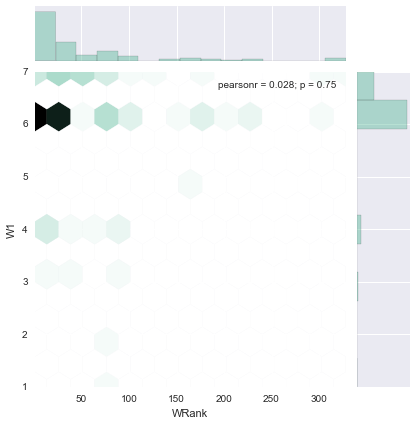

In [425]:
sns.jointplot(x = tennis.WRank, y = tennis.W1, kind="hex", color="#4CB391")

График показывает распределение выигранных первых сетов в зависимости от места в мировом рейтинге теннисистов (чем темнее цвет, тем больше концентрация). Видно, что чем выше ранг теннисиста (WRank), тем больше вероятность для него выиграть первый сет (выиграть 6 или 7 геймов за сет).


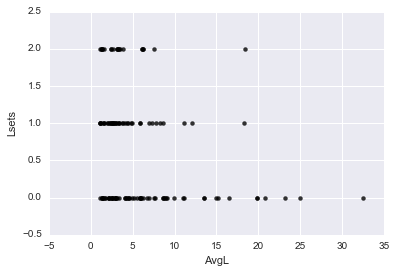

In [426]:
sns.regplot(x= 'AvgL', y = 'Lsets', data = tennis, color= "black", fit_reg = False)

Ниже рассмотрены два параметра для проигравшего в теннисном матче: количество выигранных им сетов и средняя ставка на него. Как мы можем увидеть, чем меньше коэффициент на игрока, тем больше сетов он выиграл (хоть и проиграл.

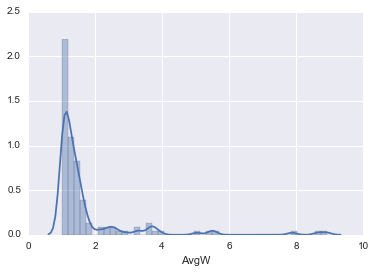

In [427]:
sns.distplot(tennis.AvgW)

Функция плотности среднего коэффициента на победу выигрывшего игрока.

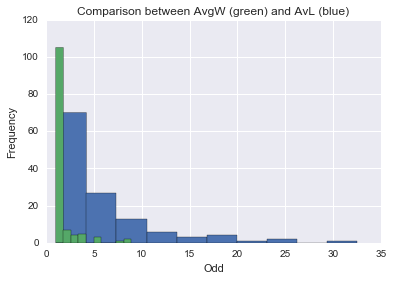

In [428]:
plt.hist(tennis.AvgL, 10)
plt.hist(tennis.AvgW, 10)
plt.title('Comparison between AvgW (green) and AvL (blue)')
plt.ylabel('Frequency')
plt.xlabel('Odd')


А здесь уже сравнение распределений средних ставок на проигравшего и победителя. Видно, насколько сильнее средняя ставка на победителя "прижимается" к 1.

In [429]:
tennis.MaxtoAvW = tennis.MaxW / tennis.AvgW
tennis.MaxtoAvW


0      1.068966
1      1.026549
2      1.077348
3      1.050725
4      1.032520
5      1.034483
6      1.050955
7      1.069519
8      1.018692
9      1.038710
10     1.009901
11     1.046667
12     1.032000
13     1.057143
14     1.040816
15     1.173442
16     1.111111
17     1.000000
18     1.043478
19     1.016667
20     1.144578
21     1.046980
22     1.457399
23     1.117541
24     1.208029
25     1.018868
26     1.030864
27     1.038278
28     1.009901
29     1.027273
         ...   
97     1.018692
98     1.027778
99     1.027778
100    1.034783
101    1.000000
102    1.076923
103    1.054217
104    1.040541
105    1.033333
106    1.018692
107    1.050000
108    1.018868
109    1.061224
110    1.009901
111    1.026549
112    1.023256
113    1.009901
114    1.032000
115    1.019231
116    1.040323
117    1.047009
118    1.066225
119    1.018349
120    1.034188
121    1.017544
122    1.042373
123    1.029630
124    1.060606
125    1.036765
126    1.025210
dtype: float64

Выше мы посчитали отношение максимальной ставки на победителя к средней ставке на него для каждого мужского матча на Australian Open 2016. Ниже воспользуемся этой переменной MaxtoAvW.

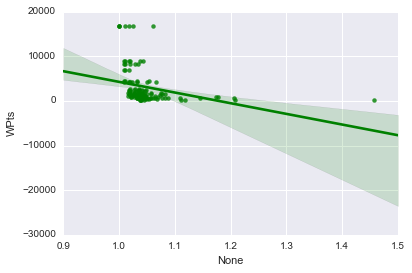

In [430]:
sns.regplot(x = tennis.MaxtoAvW, y = tennis.WPts, data = tennis, color= "g")

Зависимость отношения максимальной и средней ставки на победу выигравшего матч от его места в рейтинге теннисистов. В целом чем больше у победителя очков в рейтинге, тем меньше это соотношение.

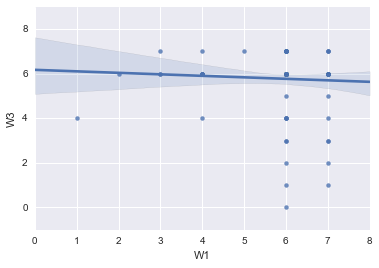

In [431]:
sns.regplot(x = tennis.W1, y = tennis.W3)

График показывает распеределие выигранных победителем первого и второго сетов.

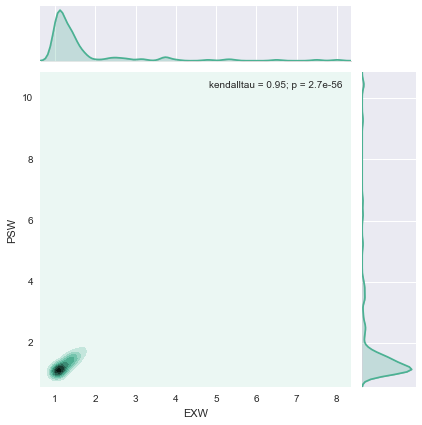

In [432]:
from scipy.stats import kendalltau
sns.jointplot(tennis.EXW, tennis.PSW, kind="kde", stat_func=kendalltau, color="#4BB193")

График выше показывает распределения ставок на победителей двух букмекерских контор: Expekt (EXW) и Pinnacles Sports (PSW).

# ЗАДАЧА 2

Все X независимы и равномерны на [0; 1]

In [433]:
X1 = stats.uniform(loc=0,scale =1)

Гистограмма распределения X1

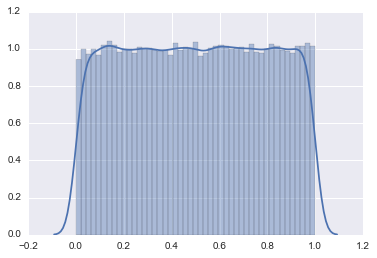

In [434]:
sns.distplot(X1.rvs(10**5))


In [435]:
X2 = stats.uniform(loc=0, scale=1)
X3 = stats.uniform(loc=0, scale=1)

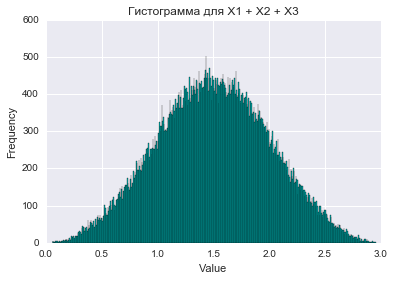

In [436]:
plt.hist(X1.rvs(10**5)+X2.rvs(10**5)+X3.rvs(10**5), 500, color='c')
plt.title('Гистограмма для X1 + X2 + X3')
plt.ylabel('Frequency')
plt.xlabel('Value')

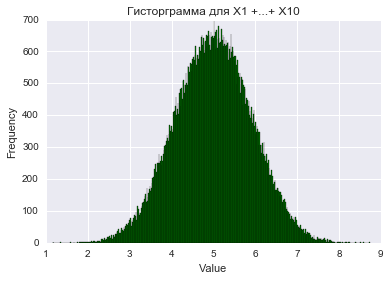

In [439]:
X_sum10 = 0
for i in range(10):
    X_sum10 += X1.rvs(10**5)
    
plt.hist(X_sum10, 500, color='g')
plt.title('Гисторграмма для X1 +...+ X10')
plt.ylabel("Frequency")
plt.xlabel('Value')

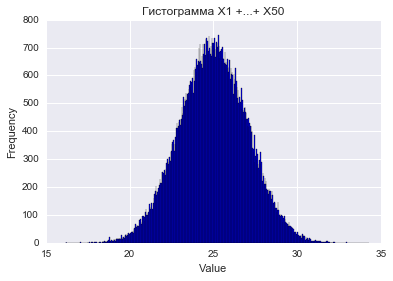

In [440]:
X_sum50 = 0
for i in range(50):
    X_sum50 += X1.rvs(10**5)

plt.hist(X_sum50, 500, color='blue')
plt.title('Гистограмма X1 +...+ X50')
plt.ylabel('Frequency')
plt.xlabel('Value')

Найдем P(X1 + X2 + X3) > 2  
P(X1 + X2 + X3) = 0.16657

In [441]:
vv = X1.rvs(10**5) + X2.rvs(10**5) + X3.rvs(10**5)
i = 0
j = 0
while i < 10**5:
    if vv[i] > 2:
        j += 1
    i += 1
print(j/10**5)

0.16637


Оценим E(X^5)  
E(X^5) = 0.166132377406

In [442]:
new_values = X1.rvs(10**5)**5
print(values_new.mean())

0.166132377406


Оценим Var(X1/[1 + X2^2])  
Var(X1/[1 + X2^2]) = 0.0602866519377

In [443]:
new_values2 = X2.rvs(10**5)**2
values1_2 = (X1.rvs(10**5)/(1+new_values2))
print(values1_2.var())

0.0602866519377


Оценим медиану (1 + X1)/(3 + X2)  
Медиана = 0.428987256999

In [444]:
v = (1+X1.rvs(10**5))/(3+X2.rvs(10**5))
print(np.median(v))

0.428987256999


Оценим 25%-ую квантиль  
25%-ая квантиль = 0.357222103505

In [445]:
print(np.percentile(v, 25))

0.357222103505


# ЗАДАЧА 3

 На самолёт,имеющий 100 мест,проданы все билеты.Для посадки в самолёт пассажиры выстроились в очередь.Первые 99 пассажиров — сумасшедшие старушки.Они садятся на наугад выбранные места.Последний пассажир садится на то место, которое указано в его билете.Если это место занято, то он с омощью стюардессы сгоняет старушку со своего законного места.Согнанная с чужого места сумасшедшая старушка становится благоразумной и садится на свое место по билету.Возможно, для этого придется согнать еще одну старушку и т.д. 
1. Какова вероятность того,что потревожат старушку,стоявшую i-ой вочереди?
2. Каково ожидаемое количество потревоженных старушек? 

$РЕШЕНИЕ$

1. Чтобы потревожили старушку, стоявшую i-ой в очереди, эта старушка должна случайным образом выбрать то место из $101-i$ оставшегося, которое по билету принадлежит последнему пассажиру, или же сесть на место другой сумасшедшей старушки так, чтобы в итоге другая сумасшедшая старушка попросила ее пересесть.    
Если старушки случайно выбирают место в порядке очереди, то i-ая старушка будет выбирать $1$ место из $101-i$. Вероятность случайно выбрать место одинакова для всех мест, а значит:  
P(i grandma will choose the last passenger`s seat)=$1 - 1/(101-i)$=$(100-i)/(101-i)$.  
НО: здесь еще надо учесть ситуацию, когда в итоге i-ая старушка будет потревожена другой.

Ответ: min P(i grandma will be bothered) = $(100-i)/(101-i)$

2. Одну из старушек потревожат с вероятностью $1/100$, так как она должна была случайно выбрать одно из $100$ мест. Если ее потревожили, то с вероятностью $98/99$ место, указанное в ее билете, будет занято, что преполагает пересаживание еще одной старушки и т.д. $0$ старушек будет потревожено с вероятностью 99/100, лишь $1$ старушка будет потревожена с вероятностью $1/100*1/99$, две старушки будут потревожены с вероятностью $1/100*98/99*1/98$ и т.д. Заметим, что при нахождении математического ожидания можно будет вынести $1/9000$ за скобку, а в ней останется сумма чисел  от $1$ до $99$.

$E(X) = 0*99/100 + 1*1/100*1/99 + 2*1/100*98/99*1/98 + ...$

In [409]:
sum(range(99))/9900

0.48999999999999999

Ответ: E(X) = $0.489$